In [60]:
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale

In [63]:
data = pd.read_csv('gapminder.csv')
data.head()

,country,incomeperperson,alcconsumption,armedforcesrate,breastcancerper100th,co2emissions,femaleemployrate,hivrate,internetuserate,lifeexpectancy,oilperperson,polityscore,relectricperperson,suicideper100th,employrate,urbanrate
0,Afghanistan,,.03,.5696534,26.8,75944000,25.6000003814697,,3.65412162280064,48.673,,0,,6.68438529968262,55.7000007629394,24.04
1,Albania,1914.99655094922,7.29,1.0247361,57.4,223747333.333333,42.0999984741211,,44.9899469578783,76.918,,9,636.341383366604,7.69932985305786,51.4000015258789,46.72
2,Algeria,2231.99333515006,.69,2.306817,23.5,2932108666.66667,31.7000007629394,.1,12.5000733055148,73.131,.42009452521537,2,590.509814347428,4.8487696647644,50.5,65.22
3,Andorra,21943.3398976022,10.17,,,,,,81,,,,,5.36217880249023,,88.92
4,Angola,1381.00426770244,5.57,1.4613288,23.1,248358000,69.4000015258789,2,9.99995388324075,51.093,,-2,172.999227388199,14.5546770095825,75.6999969482422,56.7


In [64]:
# dropping empty values
sample_data = data[['internetuserate', 'polityscore']]
sample_data = sample_data.replace(' ', np.nan)
print('Number of regions before dropping None:', len(sample_data))
sample_data = sample_data.dropna()
print('Number of regions without None:', len(sample_data))

Number of regions before dropping None: 213
Number of regions without None: 155


In [65]:
# converting values to numeric
sample_data['internetuserate'] = pd.to_numeric(sample_data['internetuserate'])
sample_data['polityscore'] = pd.to_numeric(sample_data['polityscore'])
sample_data.head()

,internetuserate,polityscore
0,3.654122,0
1,44.989947,9
2,12.500073,2
4,9.999954,-2
6,36.000335,8


In [66]:
# scaling the data
print('Mean polity score before scaling:', np.mean(sample_data['polityscore']))
sample_data['polityscore_scaled'] = scale(sample_data['polityscore'])
print('Mean polity score after scaling:', np.mean(sample_data['polityscore_scaled']))

Mean polity score before scaling: 3.8451612903225807
Mean polity score after scaling: -8.344579507666499e-17


In [52]:
reg = smf.ols('internetuserate ~ polityscore_scaled', data=sample_data).fit()
print(reg.summary())

                            OLS Regression Results                            
Dep. Variable:        internetuserate   R-squared:                       0.133
Model:                            OLS   Adj. R-squared:                  0.127
Method:                 Least Squares   F-statistic:                     23.42
Date:                Sun, 14 Mar 2021   Prob (F-statistic):           3.15e-06
Time:                        12:31:03   Log-Likelihood:                -721.96
No. Observations:                 155   AIC:                             1448.
Df Residuals:                     153   BIC:                             1454.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             32.5309      2

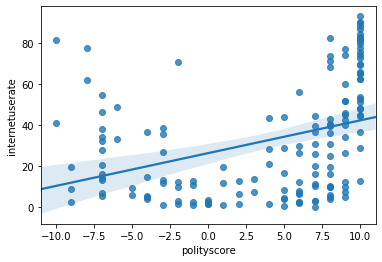

In [57]:
# the regression plot
sns.regplot(x="polityscore", y="internetuserate", data=sample_data);

### Summary
* p-value = 3.15e-06 which is very small -> the rate of Internet users is significantly associated with the democracy score.
* beta = 9.9798 -> the association is positive. The higher the democracy score - the higher the rate of Internet users.